In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.cluster.hierarchy as sch 
from scipy.stats import zscore 
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
sns.set(context="notebook",palette="Spectral",style='darkgrid',color_codes=True)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

Attribute Information:

1. Target: Claim Status (Claimed)
    
2. Code of tour firm (Agency_Code)

3. Type of tour insurance firms (Type)

4. Distribution channel of tour insurance agencies (Channel)

5. Name of the tour insurance products (Product)

6. Duration of the tour (Duration)

7. Destination of the tour (Destination)

8. Amount of sales of tour insurance policies (Sales)

9. The commission received for tour insurance firm (Commission)

10. Age of insured (Age)

In [29]:
data=pd.read_csv('C:\\Users\\Divya\\OneDrive\\Desktop\\Data Mining Project\\insurance_part2_data.csv')

In [30]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [67]:
data.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [68]:
data.shape

(3000, 10)

In [69]:
data.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [71]:
data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [72]:
data.duplicated().sum()

139

In [73]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000,NaN,NaN,NaN,38.091,10.4635,8,32,36,42,84
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000,NaN,NaN,NaN,14.5292,25.4815,0,0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000,NaN,NaN,NaN,70.0013,134.053,-1,11,26.5,63,4580
Sales,3000,NaN,NaN,NaN,60.2499,70.734,0,20,33,69,539
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* There are 3000 rows and 10 columns in the dataset.

* Out of 10 columns, 'Age' and 'Duration' variables are of int64 datatype. Variables 'Commission' and 'Sales' are of float64 datatype. Remaining variables are of object datatype.

* The variables with object datatype have to be converted to categorical, since algorithm cannot take variables with object datatype.

* There are no null values in the dataset. 

* There are 139 duplicates in the dataset. These duplicates have to be either removed or replaced.

* The average age of individuals buying the insurance policy is around 38.

* There are 4 unique values in 'Agency_Code' (EPX,C2B,CWT,JZI) with EPX having high frequency of 1365.

* The most preferred type of tour insurance firm seems to be Travel Agency and most preferred type of distribution channel is Online.

* The most preferred 'Product Name' is 'Customised Plan' and most preferred destination is 'ASIA'.

* There are 3 unique destinations (Asia, America, Europe) and 5 unique products (Customised Plan, Cancellation Plan, Bronze plan, Silver plan, Gold plan).

* The average commission received by tour insurance firms is 14.52.

* Out of 3000, 2076 individuals did not claim their insurance.

* By looking at the data, it seems there are outliers in many variables.

In [6]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
listnumericcolumns = list(data_num.columns.values)
len(listnumericcolumns)

4

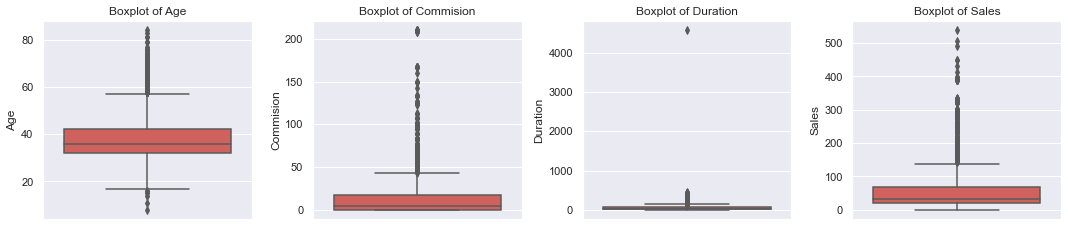

In [7]:
#Check for presence of outliers in each feature

plt.figure(figsize = (15,15))
feature_list = data_num.columns
for i in range(len(feature_list)):
    plt.subplot(5,4, i + 1)
    sns.boxplot(y = data_num[feature_list[i]], data = data_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

There are outliers in all the continous variables.

In [76]:
# Getting unique count for all categorical variables

for column in data[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',data[column].nunique())
    print(data[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




# EDA:

# Univariate Analysis:

In [77]:
# Let's check the skewness values quantitatively

data.skew().sort_values(ascending=False)

Duration     13.784681
Commision     3.148858
Sales         2.381148
Age           1.149713
dtype: float64

# Age:

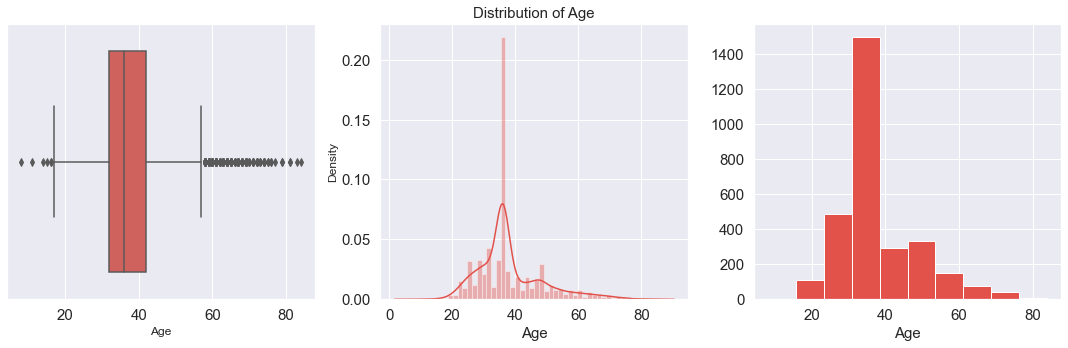

In [78]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='Age',data=data,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(data['Age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_title('Distribution of Age', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data['Age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

There are outliers in the variable 'Age'. It is positively skewed at 1.149713. The distplot shows distribution of data from 20 to 80. The majority of individuals are between 30 to 40 age group. 

# Commision:

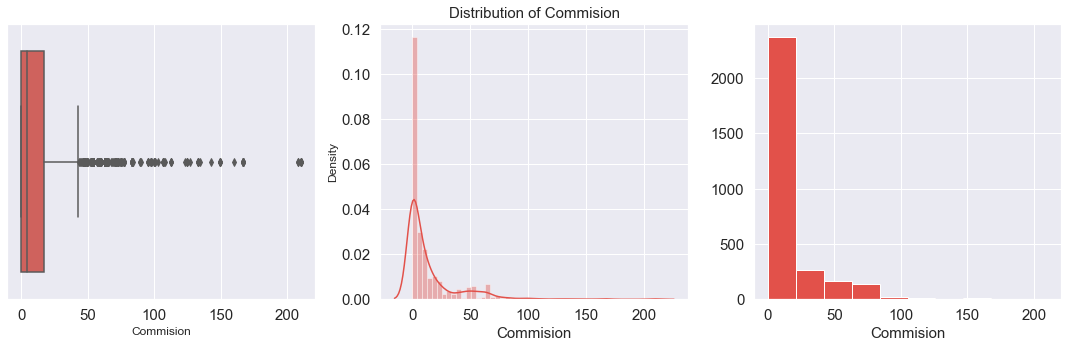

In [243]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='Commision',data=data,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(data['Commision'],ax=ax2)
ax2.set_xlabel('Commision', fontsize=15)
ax2.set_title('Distribution of Commision', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data['Commision'])
ax3.set_xlabel('Commision', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

There are outliers in the variable 'Commision'. It is positively skewed at 3.148858. The distplot shows distribution of data from 0 to 100.

# Duration:

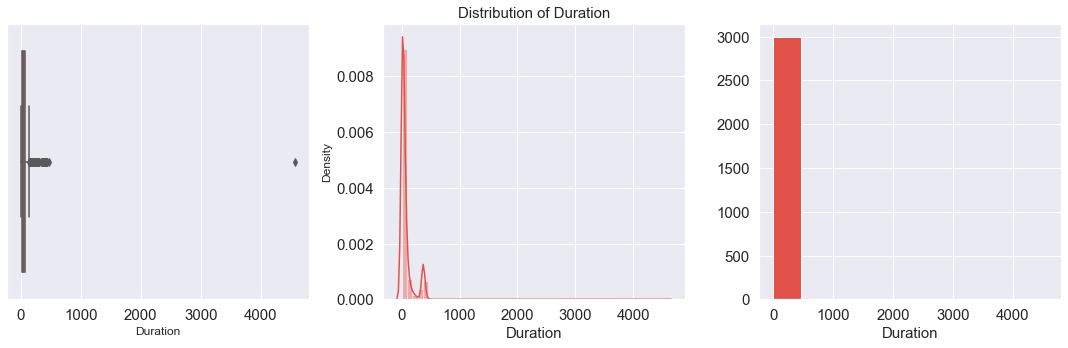

In [244]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='Duration',data=data,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(data['Duration'],ax=ax2)
ax2.set_xlabel('Duration', fontsize=15)
ax2.set_title('Distribution of Duration', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data['Duration'])
ax3.set_xlabel('Duration', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

There are outliers in the variable 'Duration'. It is positively skewed at 13.784681. The distplot shows distribution of data from 0 to 100.

# Sales:

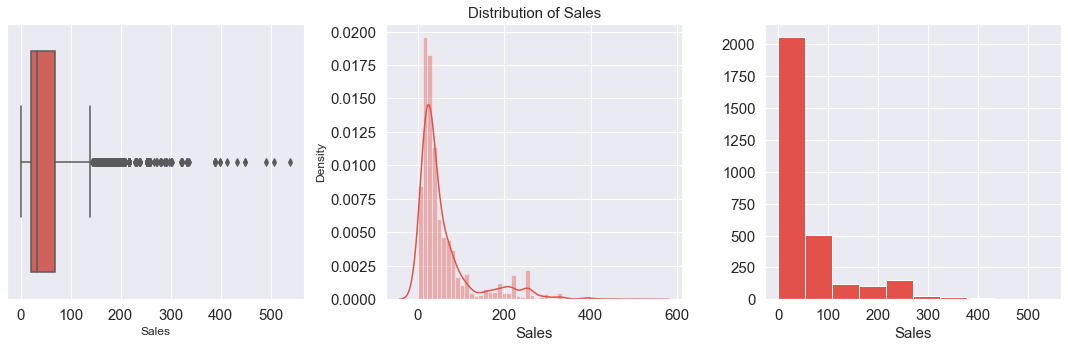

In [245]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='Sales',data=data,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(data['Sales'],ax=ax2)
ax2.set_xlabel('Sales', fontsize=15)
ax2.set_title('Distribution of Sales', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data['Sales'])
ax3.set_xlabel('Sales', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

There are outliers in the variable 'Sales'. It is positively skewed at 2.381148. The distplot shows distribution of data from 0 to 300.

There are outliers in all the variables, but the sales and commision can be a genuine business value. Random Forest and CART can handle the outliers. Hence, Outliers are not treated for now, we will keep the data as it is.

# Categorical variables:

# Agency_Code:

<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

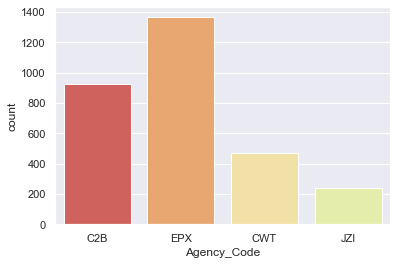

In [246]:
sns.countplot(data = data, x = 'Agency_Code')

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

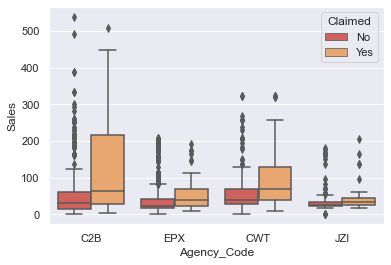

In [247]:
sns.boxplot(data = data, x='Agency_Code',y='Sales', hue='Claimed')

* There are outliers in the variable 'Agency_Code'. From the boxplot, it appears that more number of claims were made by C2B tour agency followed by CWT.

# Type:

<AxesSubplot:xlabel='Type', ylabel='count'>

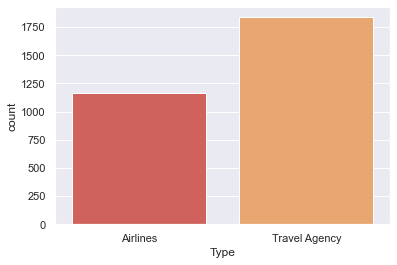

In [248]:
sns.countplot(data = data, x = 'Type')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

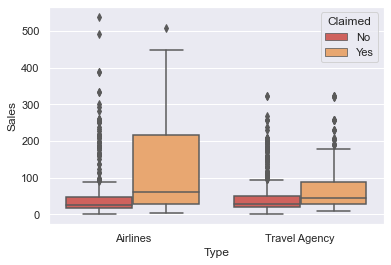

In [249]:
sns.boxplot(data = data, x='Type',y='Sales', hue='Claimed')

There are outliers in the variable 'Type'. From the countplot, it is evident that Travel Agency has maximum frequency. From the boxplot, it appears that more number of claims were made by Airlines.

# Channel:

<AxesSubplot:xlabel='Channel', ylabel='count'>

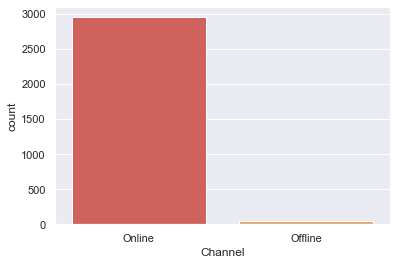

In [250]:
sns.countplot(data = data, x = 'Channel')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

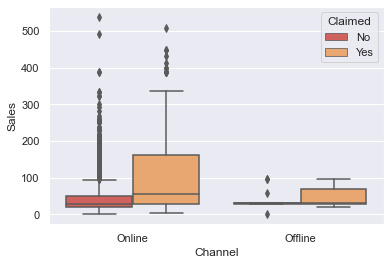

In [251]:
sns.boxplot(data = data, x='Channel',y='Sales', hue='Claimed')

There are outliers in the variable 'Channel'. From the countplot, it is evident that Online channel has maximum frequency. From the boxplot, it appears that more number of claims were made through online channel.

# Product Name:

<AxesSubplot:xlabel='Product Name', ylabel='count'>

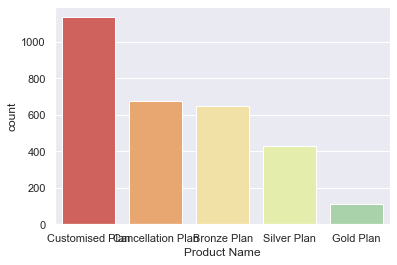

In [12]:
sns.countplot(data = data, x = 'Product Name')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

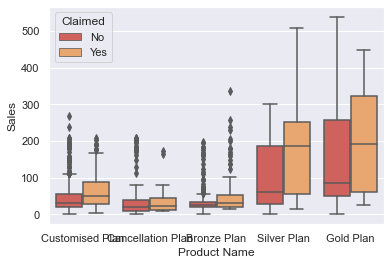

In [253]:
sns.boxplot(data = data, x='Product Name',y='Sales', hue='Claimed')

There are outliers in the variable 'Product Name'. From the countplot, it is evident that Customised plan seems to be most liked plan by the customers. From the boxplot, it appears that more number of claims were made by customers who opted for gold plan and silver plan.

# Destination:

<AxesSubplot:xlabel='Destination', ylabel='count'>

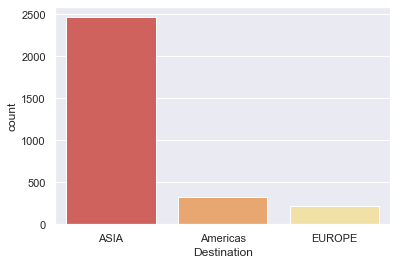

In [13]:
sns.countplot(data = data, x = 'Destination')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

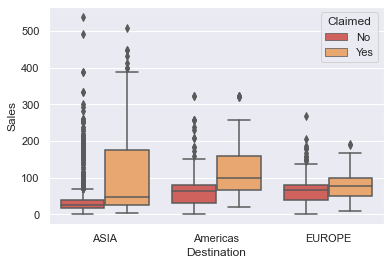

In [14]:
sns.boxplot(data = data, x='Destination',y='Sales', hue='Claimed')

There are outliers in the variable 'Destination'. From the countplot, it is evident that Asia is the most preferred destination by travellers. From the boxplot, it appears that more number of claims were made by customers who chose Asia as destination.

# Bivariate Analysis:

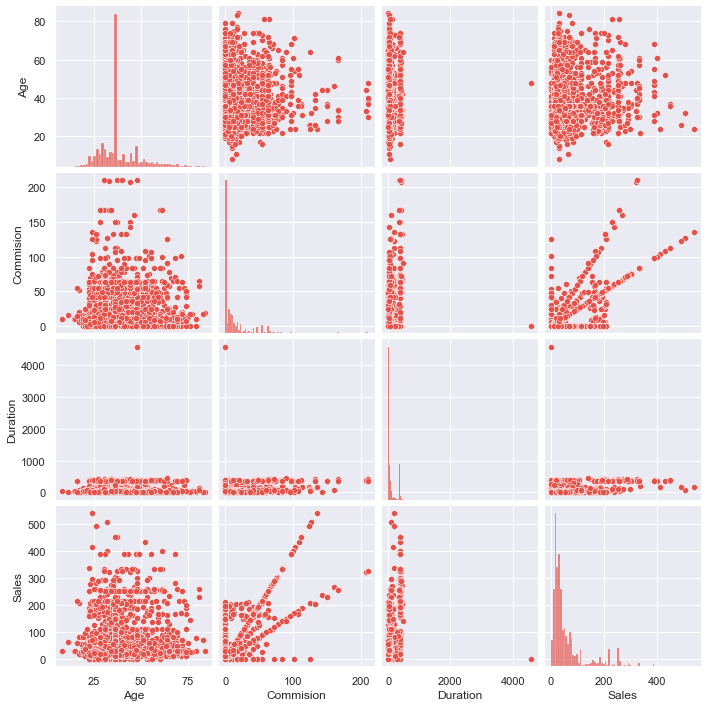

In [18]:
sns.pairplot(data=data);

# Multivariate Analysis:

In [79]:
corr = data.corr()
round(corr,2)

,Age,Commision,Duration,Sales
Age,1.00,0.07,0.03,0.04
Commision,0.07,1.00,0.47,0.77
Duration,0.03,0.47,1.00,0.56
Sales,0.04,0.77,0.56,1.00


<AxesSubplot:>

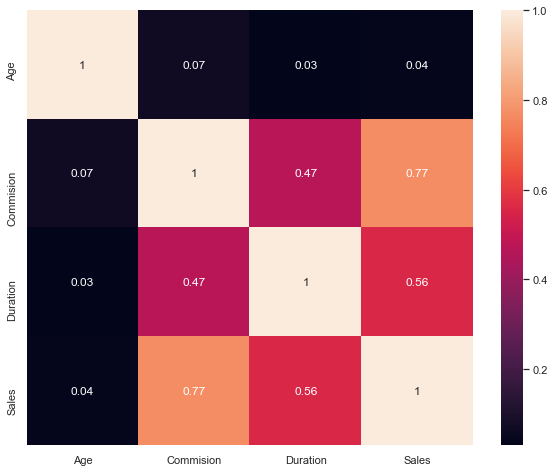

In [80]:
fig_dims = (10, 8)
fig = plt.subplots(figsize=fig_dims)
sns.heatmap(round(corr,2), annot=True)

* There is not much correlation between the variables.

* There is no negative correlation as well. There is only positive correlation.

* There is decent correlation between 'Commision' and 'Sales' which implies more the number of sales, more the commision received by insurance agencies.

# Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network:

# Converting Object datatype to Categorical

In [31]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [83]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [32]:
# Extracting the target column into separate vectors for training set and test set

X = data.drop("Claimed", axis=1)

y = data.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [33]:
# Scaling the attributes.

from scipy.stats import zscore
X_scaled=X.apply(zscore)
X_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


In [34]:
# splitting data into training and test set for independent attributes

X_train, X_test, train_labels, test_labels = train_test_split(X_scaled, y, test_size=.30, random_state=1)

In [35]:
# Checking the dimensions of the training and test data

print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


# Building Decision Tree Classifier:

In [36]:
dtcl = DecisionTreeClassifier(criterion = 'gini' )

In [37]:
dtcl.fit(X_train, train_labels)

DecisionTreeClassifier()

In [38]:
print (pd.DataFrame(dtcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Duration      0.268349
Sales         0.203073
Agency_Code   0.194356
Age           0.180357
Commision     0.085218
Product Name  0.036740
Destination   0.019959
Channel       0.008852
Type          0.003095


# Grid Search for finding Optimal values:

In [39]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [4.85, 4.90,4.95, 5.0,5.05,5.10,5.15],
    'min_samples_leaf': [40, 41, 42, 43, 44], 
    'min_samples_split': [150, 175, 200, 210, 220, 230, 240, 250, 260, 270],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [40]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 5.0, 'min_samples_leaf': 42, 'min_samples_split': 200}


DecisionTreeClassifier(max_depth=5.0, min_samples_leaf=42,
                       min_samples_split=200, random_state=1)

# Generating Tree

In [19]:
train_char_label = ['no', 'yes']
tree_regularized = open('C:\\Users\\Divya\\OneDrive\\Desktop\\Data Mining Project\\tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

http://webgraphviz.com/

# Feature Importance

In [41]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.604561
Sales         0.254851
Product Name  0.055097
Duration      0.036387
Age           0.026631
Commision     0.022472
Type          0.000000
Channel       0.000000
Destination   0.000000


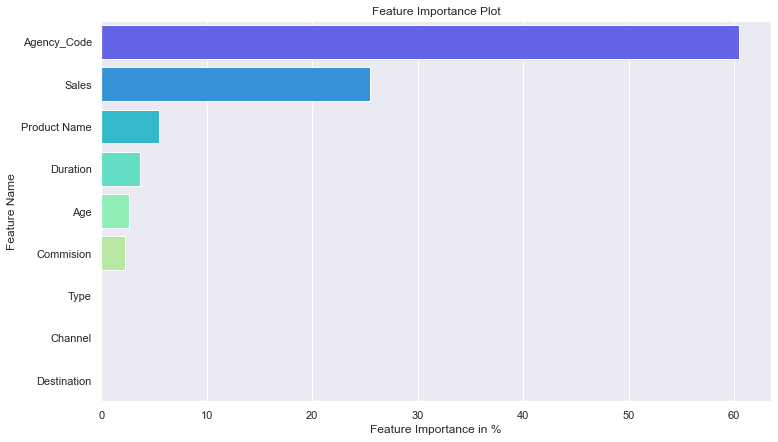

In [42]:
x=pd.DataFrame(best_grid_dtcl.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

# Predicting on Training and Test dataset

In [43]:
ytrain_predict_dtcl = best_grid_dtcl.predict(X_train)
ytest_predict_dtcl= best_grid_dtcl.predict(X_test)

# Getting the Predicted Classes and Probs

In [44]:
ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(X_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.935714,0.064286
1,0.394089,0.605911
2,0.394089,0.605911
3,0.311111,0.688889
4,0.927586,0.072414


# Building Random Forest Model

In [45]:
param_grid_rfcl = {
    'max_depth': [4,5,6],#20,30,40
    'max_features': [2,3,4,5],## 7,8,9
    'min_samples_leaf': [8,9,11,15],## 50,100
    'min_samples_split': [46,50,55], ## 60,70
    'n_estimators': [290,350,400] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

# Fitting the model to RFCL values obtained by optimal grid search method:

In [46]:
grid_search_rfcl.fit(X_train, train_labels)
print(grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

{'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 9, 'min_samples_split': 46, 'n_estimators': 290}


RandomForestClassifier(max_depth=6, max_features=5, min_samples_leaf=9,
                       min_samples_split=46, n_estimators=290, random_state=1)

# Predicting on Training and Test dataset

In [47]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

# Getting the Predicted Classes and Probs

In [48]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.750891,0.249109
1,0.477810,0.522190
2,0.455781,0.544219
3,0.250311,0.749689
4,0.935500,0.064500


# Feature Importance

In [49]:
print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.353930
Product Name  0.201006
Sales         0.167986
Commision     0.107705
Duration      0.071311
Age           0.052319
Type          0.038278
Destination   0.006493
Channel       0.000972


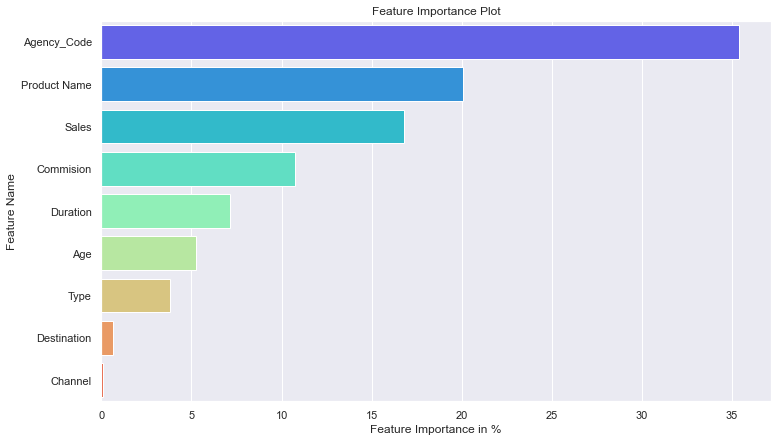

In [50]:
x=pd.DataFrame(best_grid_rfcl.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

# Building ANN Model

In [51]:
param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200], # 50, 200
    'max_iter': [2500,3000,4000], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [52]:
grid_search_nncl.fit(X_train, train_labels)
grid_search_nncl.best_params_
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

# Predicting the Training and Testing data

In [53]:
ytrain_predict_nncl = best_grid_nncl.predict(X_train)
ytest_predict_nncl = best_grid_nncl.predict(X_test)

# Getting the Predicted Classes and Probs

In [54]:
ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(X_test)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

,0,1
0,0.829737,0.170263
1,0.624472,0.375528
2,0.527335,0.472665
3,0.325167,0.674833
4,0.923836,0.076164


# Performance Metrics:

# Decision Tree Model Evaluation

# AUC and ROC for the training data

AUC: 0.835


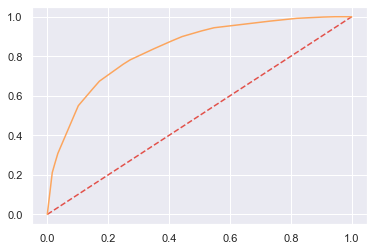

In [56]:
# predict probabilities
probs = best_grid_dtcl.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)

# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

# Confusion Matrix for the training data

In [57]:
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1321,  150],
       [ 283,  346]], dtype=int64)

In [58]:
#Train Data Accuracy

cart_train_acc=best_grid_dtcl.score(X_train,train_labels) 
cart_train_acc

0.7938095238095239

# Classification report for training data

In [59]:
print(classification_report(train_labels, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1471
           1       0.70      0.55      0.62       629

    accuracy                           0.79      2100
   macro avg       0.76      0.72      0.74      2100
weighted avg       0.79      0.79      0.79      2100



# CART Metrics for training data

In [60]:
cart_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
data=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(data.loc["1"][0],2)
cart_train_recall=round(data.loc["1"][1],2)
cart_train_f1=round(data.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.7
cart_train_recall  0.55
cart_train_f1  0.62


# AUC and ROC for the test data

AUC: 0.792


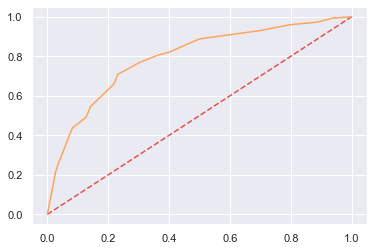

In [61]:
# predict probabilities
probs = best_grid_dtcl.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)

# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

# Confusion Matrix for the testing data

In [62]:
confusion_matrix(test_labels, ytest_predict_dtcl)

array([[555,  50],
       [166, 129]], dtype=int64)

In [63]:
#Test Data Accuracy

cart_test_acc=best_grid_dtcl.score(X_test,test_labels)
cart_test_acc

0.76

# Classification report for testing data

In [64]:
print(classification_report(test_labels, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.44      0.54       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.69       900
weighted avg       0.75      0.76      0.74       900



# CART Metrics for testing data

In [66]:
cart_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.72
cart_test_recall  0.44
cart_test_f1  0.54


# Cart Conclusion

Train Data:

AUC: 83.5%

Accuracy: 79.3%

Precision: 70%

f1-Score: 62%

Test Data:

AUC: 79.2%

Accuracy: 76%

Precision: 72%

f1-Score: 54%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

Agency_Code is the most important variable for predicting the insurance claims.

# Random Forest Model Evaluation

# AUC and ROC for the training data

Area under Curve is 0.8589324718808463


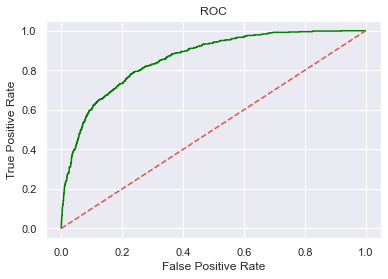

In [69]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

# Confusion Matrix for the training data

In [70]:
confusion_matrix(train_labels, ytrain_predict_rfcl)

array([[1321,  150],
       [ 245,  384]], dtype=int64)

In [72]:
#Train Data Accuracy

rf_train_acc=best_grid_rfcl.score(X_train,train_labels) 
rf_train_acc

0.8119047619047619

# Classification report for training data

In [73]:
print(classification_report(train_labels, ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1471
           1       0.72      0.61      0.66       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.77      2100
weighted avg       0.81      0.81      0.81      2100



# RF Metrics for training data

In [74]:
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.72
rf_train_recall  0.61
rf_train_f1  0.66


# AUC and ROC for the test data

Area under Curve is 0.8217117243311387


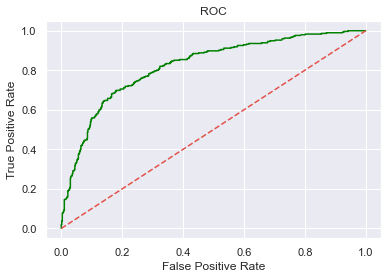

In [75]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

# Confusion Matrix for the testing data

In [76]:
confusion_matrix(test_labels,ytest_predict_rfcl)

array([[550,  55],
       [146, 149]], dtype=int64)

In [77]:
# Test data acuuracy

rf_test_acc=best_grid_rfcl.score(X_test,test_labels)
rf_test_acc

0.7766666666666666

# Classification report for testing data

In [78]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       605
           1       0.73      0.51      0.60       295

    accuracy                           0.78       900
   macro avg       0.76      0.71      0.72       900
weighted avg       0.77      0.78      0.76       900



# RF metrics for Testing data

In [79]:
rf_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.73
rf_test_recall  0.51
rf_test_f1  0.6


# Random Forest Conclusion

Train Data

AUC: 85.8%

Accuracy: 81.1%

Precision: 72%

f1-Score: 66%

Test Data:

AUC: 82.1%

Accuracy: 77.7%

Precision: 73%

f1-Score: 60%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

Agency_Code is the most important variable for predicting the insurance claims.

# ANN Model Evaluation

# AUC and ROC for the training data

Area under Curve is 0.8184600203834819


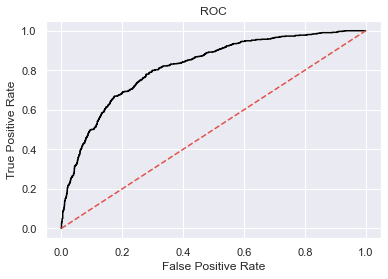

In [80]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

# Confusion Matrix for the training data

In [82]:
confusion_matrix(train_labels, ytrain_predict_nncl)

array([[1312,  159],
       [ 311,  318]], dtype=int64)

In [83]:
# Train data accuracy

nn_train_acc=best_grid_nncl.score(X_train,train_labels) 
nn_train_acc

0.7761904761904762

# Classification report for training data

In [84]:
print(classification_report(train_labels, ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1471
           1       0.67      0.51      0.58       629

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.71      2100
weighted avg       0.77      0.78      0.77      2100



# ANN Metrics for training data

In [85]:
nn_metrics=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.67
nn_train_recall  0.51
nn_train_f1  0.58


# AUC and ROC for the test data

Area under Curve is 0.8038856982770697


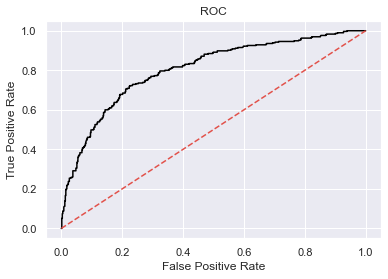

In [86]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

# Confusion Matrix for the testing data

In [87]:
confusion_matrix(test_labels,ytest_predict_nncl)

array([[556,  49],
       [168, 127]], dtype=int64)

In [88]:
# Test data accuracy

nn_test_acc=best_grid_nncl.score(X_test,test_labels)
nn_test_acc

0.7588888888888888

# Classification report for testing data

In [89]:
print(classification_report(test_labels,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.43      0.54       295

    accuracy                           0.76       900
   macro avg       0.74      0.67      0.69       900
weighted avg       0.75      0.76      0.74       900



# ANN Metrics for testing data

In [90]:
nn_metrics=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.72
nn_test_recall  0.43
nn_test_f1  0.54


# ANN Conclusion

Train Data

AUC: 81.9%

Accuracy: 77.6%

Precision: 67%

f1-Score: 58%

Test Data:

AUC: 80.3%

Accuracy: 75.9%

Precision: 72%

f1-Score: 54%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

Agency_Code is the most important variable for predicting the insurance claims.

# Comparison of the performance metrics from the 3 models

In [91]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.76,0.81,0.78,0.78,0.76
AUC,0.84,0.79,0.86,0.82,0.82,0.80
Recall,0.55,0.44,0.61,0.51,0.51,0.43
Precision,0.70,0.72,0.72,0.73,0.67,0.72
F1 Score,0.62,0.54,0.66,0.60,0.58,0.54


# ROC Curve for the 3 models on the Training data

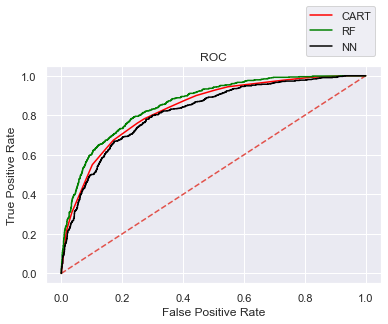

In [92]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# ROC Curve for the 3 models on the Test data


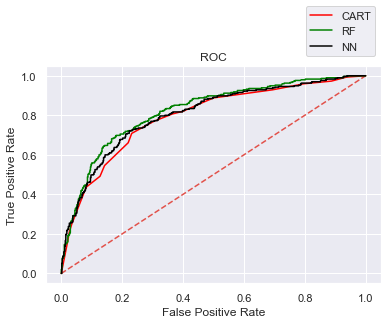

In [93]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

CONCLUSION :
    
•	CART, Random Forest, ANN have relatively similar scores with minimal difference when it comes to training and testing data.

•	However, Random Forest model has the better performance (better accuracy) among all the three models. The percentage deviation between Training and Testing Dataset also is reasonably under control, suggesting a robust model.

•	Hence, I am selecting the RF model, as it has better accuracy, precision, recall, f1 score compared to CART & ANN.
•	When it comes to feature importance, Agency_Code is the most important variable for predicting the insurance claims.


# Business insights and recommendations:

Looking at the model, more data will help us understand and predict models better.

This is understood by looking at the insurance data by drawing relations between different variables such as day of the incident, time, age group, and associating it with other external information such as location, behavior patterns, weather information, airline/vehicle types, etc.

• Streamlining online experiences benefitted customers, leading to an increase in conversions, which subsequently raised profits. 

• As per the data 90% of insurance is done by online channel. 

• Other interesting fact, is almost all the offline business has a claimed associated, need to find why? 

• Need to train the JZI agency resources to pick up sales as they are in bottom, need to run promotional marketing campaign or evaluate if we need to tie up with alternate agency 

• Also based on the model we are getting 80%accuracy, so we need customer books airline tickets or plans, cross sell the insurance based on the claim data pattern. 

• Other interesting fact is more sales happen via Agency than Airlines and the trend shows the claim are processed more at Airline. So we may need to deep dive into the process to understand the workflow and why?

Key performance indicators (KPI) The KPI’s of insurance claims are: 

• Reduce claims cycle time • Increase customer satisfaction 

• Combat fraud 

• Optimize claims recovery 

• Reduce claim handling costs